In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
test = pd.read_csv("E:\\MBA\\Internship\\Internship\\test.csv")

In [3]:
train = pd.read_csv("E:\\MBA\\Internship\\Internship\\train.csv")

In [4]:
train_obj = train.select_dtypes(object)
train_dummies = pd.get_dummies(train_obj)
train_exc = train.select_dtypes(exclude = object)
train_main = pd.concat([train_exc, train_dummies], axis=1)
train_main

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [8]:
test_obj = test.select_dtypes(object)
test_dummies = pd.get_dummies(test_obj)
test_exc = test.select_dtypes(exclude = object)
test_main = pd.concat([test_exc, test_dummies], axis=1)
test_main

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


## VISUALIZATION

### CORRELATION MATRIX

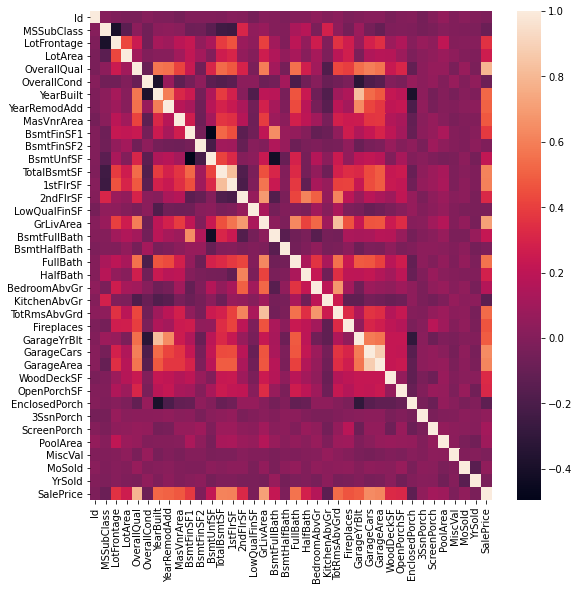

In [9]:
plt.figure(figsize=(9,9))
sns.heatmap(train.corr())
plt.show()

### Relationship between Catagorical Features and Sales price

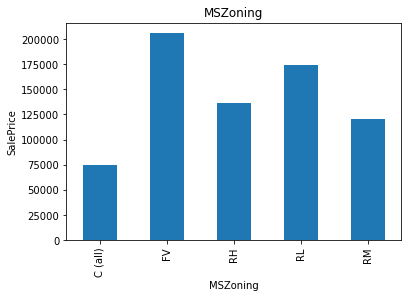

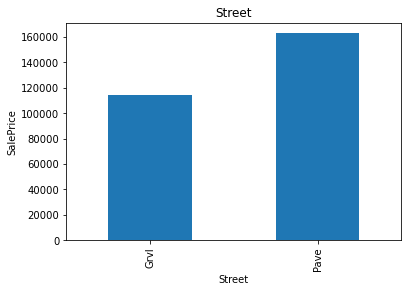

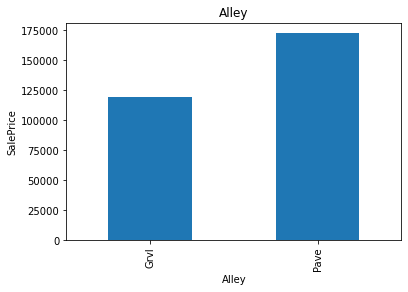

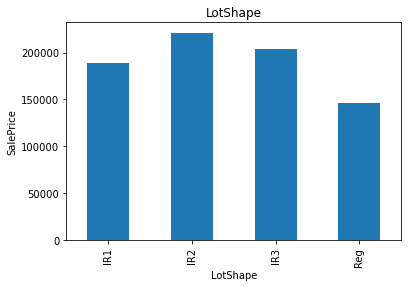

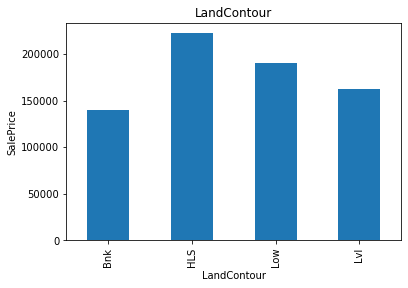

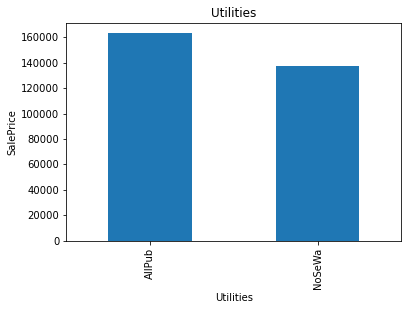

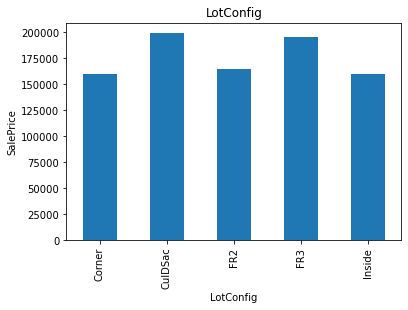

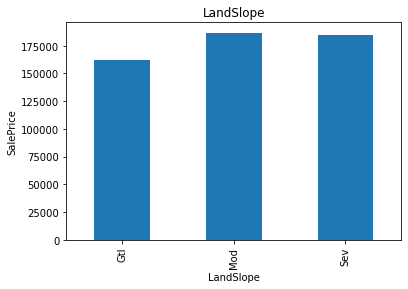

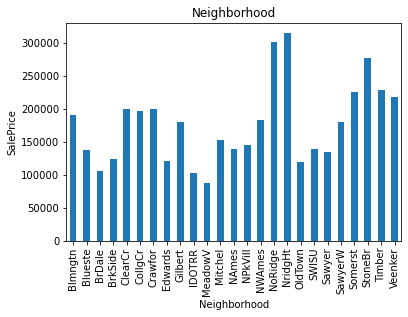

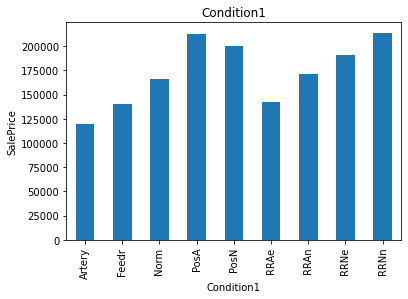

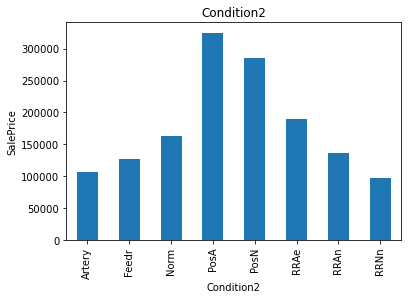

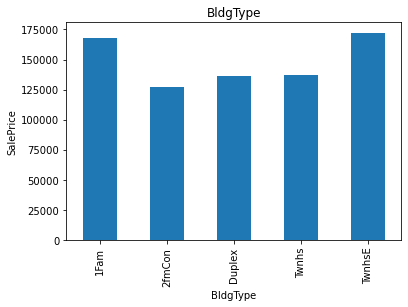

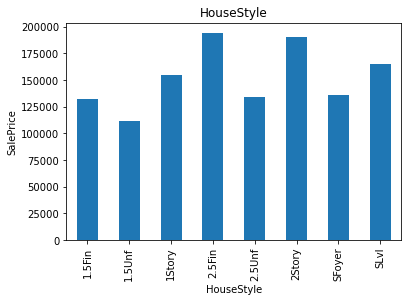

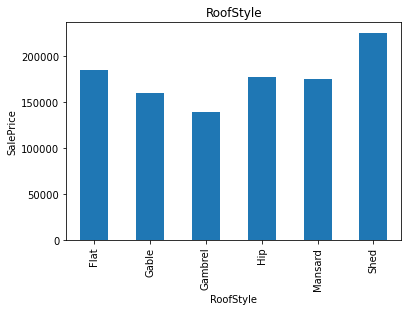

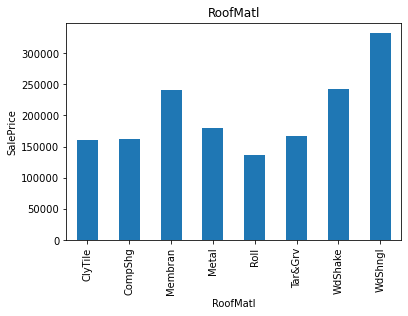

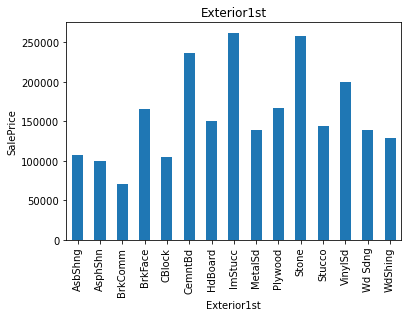

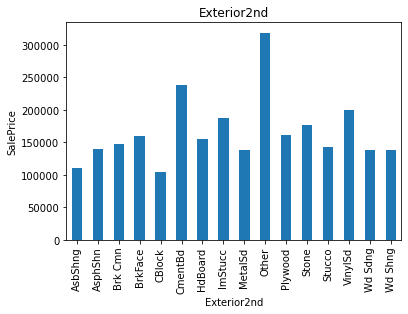

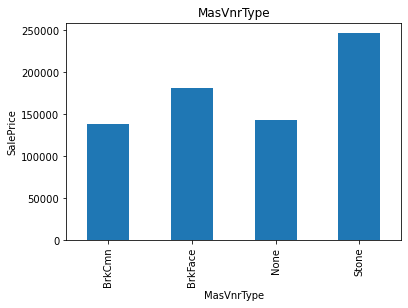

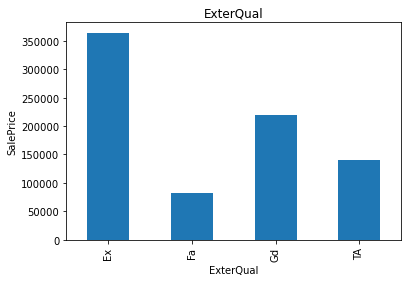

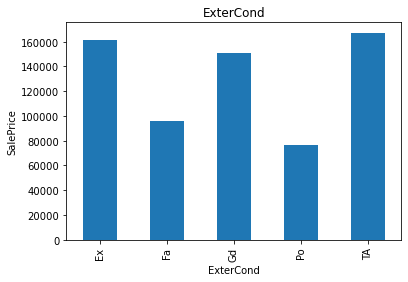

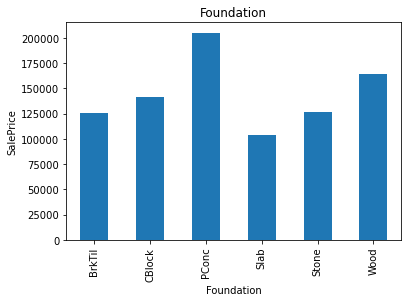

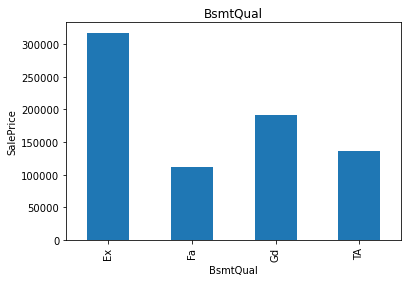

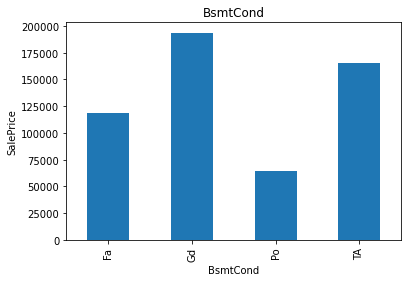

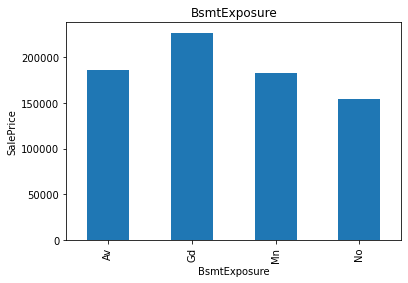

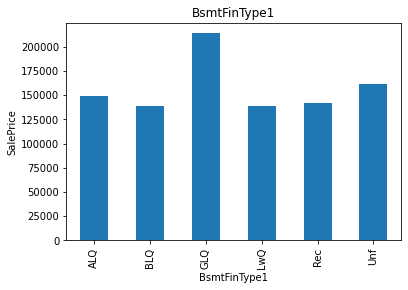

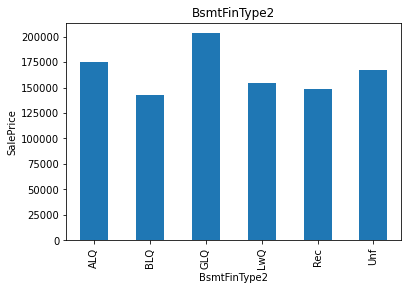

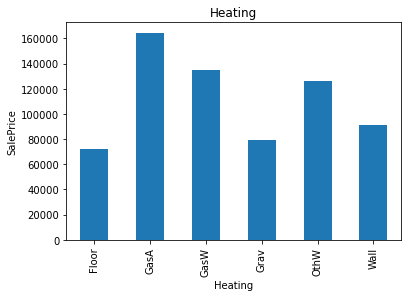

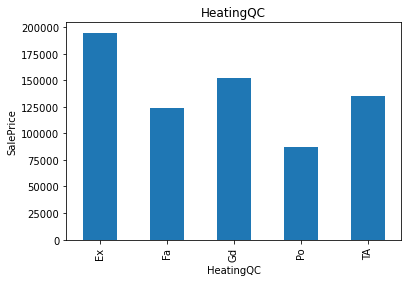

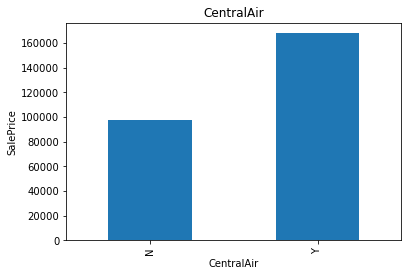

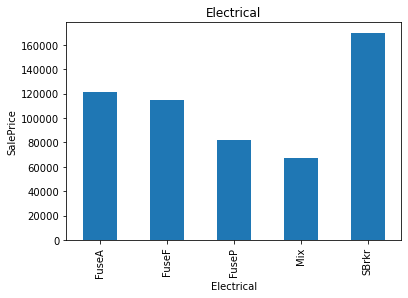

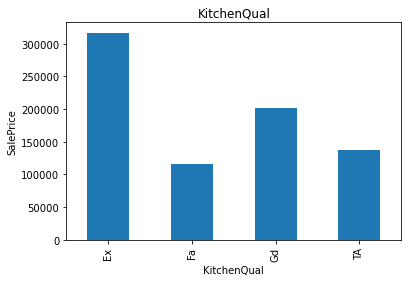

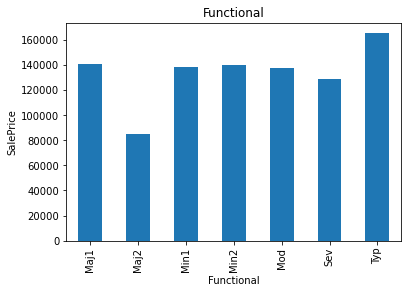

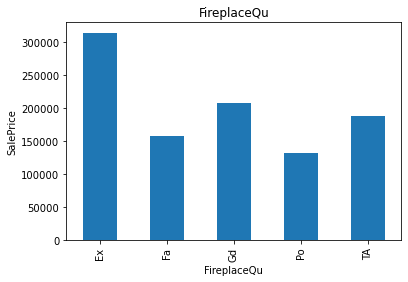

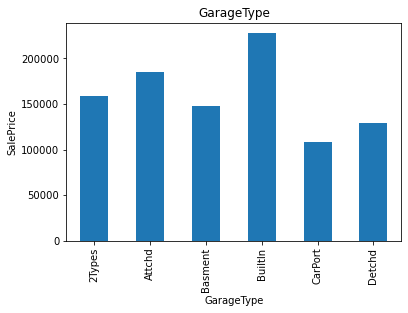

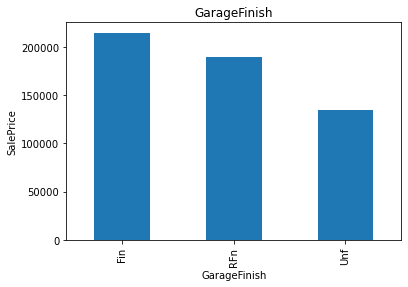

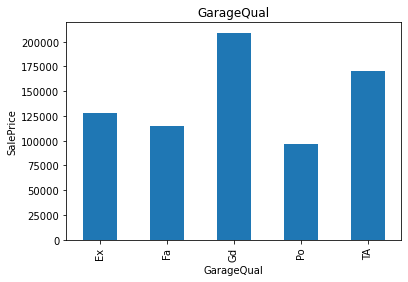

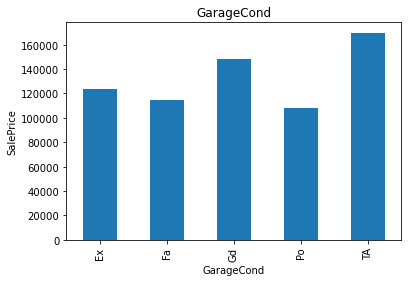

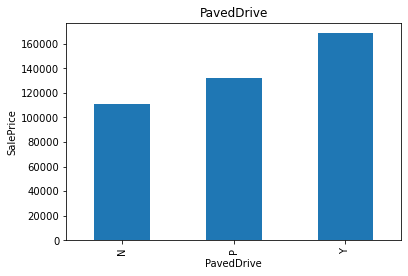

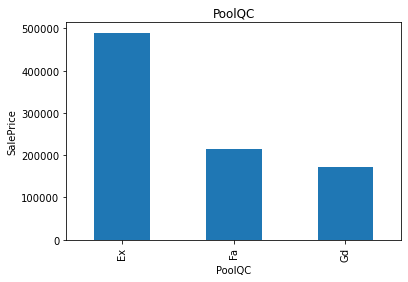

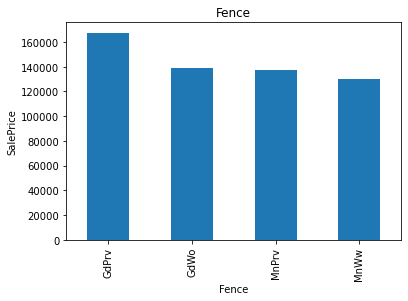

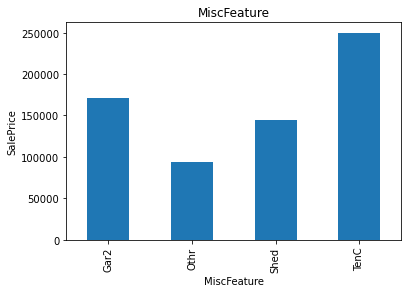

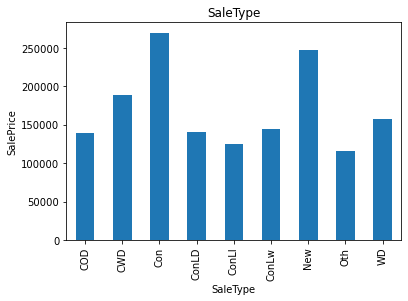

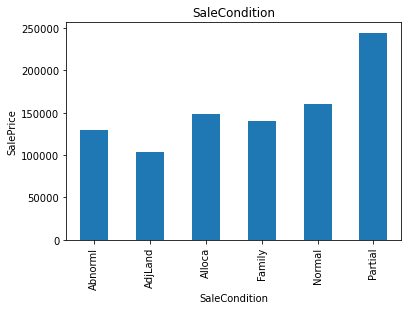

In [10]:
for feature in test_obj:
    train.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Countplots


In [11]:
count = ["MSZoning","MSSubClass","LotShape","SaleCondition","Neighborhood","YrSold","LotConfig","HouseStyle","BedroomAbvGr",
         "OverallQual","OverallCond","RoofStyle"]

In [12]:
list(enumerate(count))

[(0, 'MSZoning'),
 (1, 'MSSubClass'),
 (2, 'LotShape'),
 (3, 'SaleCondition'),
 (4, 'Neighborhood'),
 (5, 'YrSold'),
 (6, 'LotConfig'),
 (7, 'HouseStyle'),
 (8, 'BedroomAbvGr'),
 (9, 'OverallQual'),
 (10, 'OverallCond'),
 (11, 'RoofStyle')]

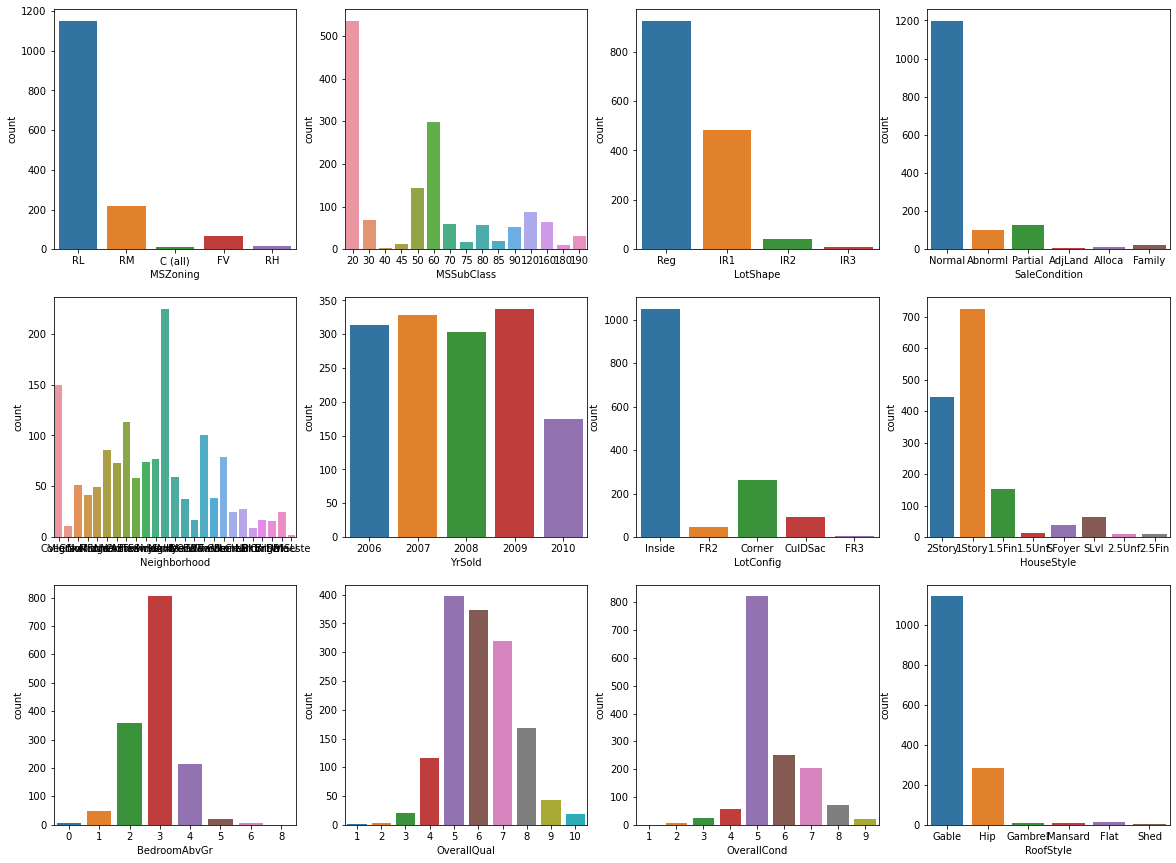

In [13]:
plt.figure(figsize=(20,15))
for i in enumerate(count):
    plt.subplot(3,4,i[0]+1)
    sns.countplot(i[1],data=train)
#     plt.xticks(rotaion=90)
    

### Determining the Outliers using Boxplot

In [14]:
def Box(train):
#     plt.rcParams['figure.figsize'] = [8,5]
    plt.title("box plot")
    sns.boxplot(train)
    plt.show()

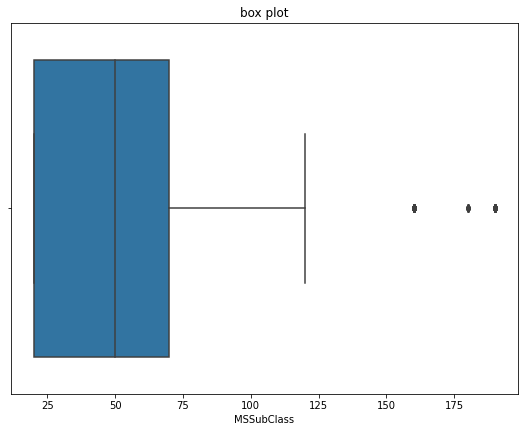

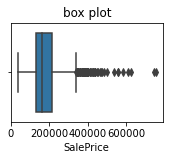

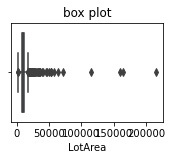

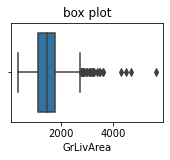

In [15]:
plt.figure(figsize=(20,15))
plt.subplots_adjust()
plt.subplot(2,2,1)
Box(train["MSSubClass"])
plt.subplot(2,2,2)
Box(train["SalePrice"])
plt.subplot(2,2,3)
Box(train["LotArea"])
plt.subplot(2,2,4)
Box(train['GrLivArea'])

### Using Bar Graph to Show the Relationship Between Two Variables/ Features

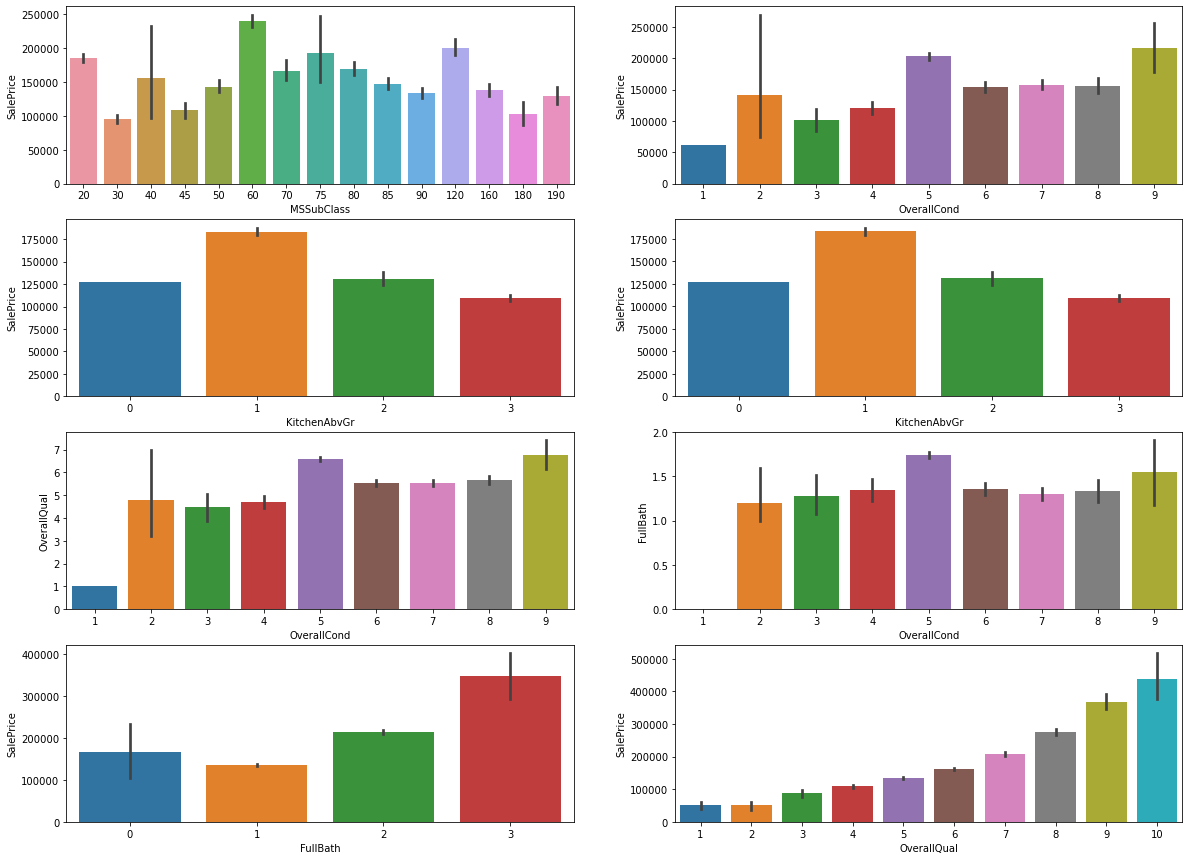

In [16]:
plt.figure(figsize=(20,15))
plt.subplots_adjust()
plt.subplot(4,2,1)
sns.barplot(x='MSSubClass', y='SalePrice',data=train)
plt.subplot(4,2,2)
sns.barplot(x='OverallCond', y='SalePrice',data=train)
plt.subplot(4,2,3)
sns.barplot(x='KitchenAbvGr', y='SalePrice',data=train)
plt.subplot(4,2,4)
sns.barplot(x='KitchenAbvGr', y='SalePrice',data=train)
plt.subplot(4,2,5)
sns.barplot(x='OverallCond', y='OverallQual',data=train)
plt.subplot(4,2,6)
sns.barplot(x='OverallCond', y='FullBath',data=train)
plt.subplot(4,2,7)
sns.barplot(x='FullBath', y='SalePrice',data=train)
plt.subplot(4,2,8)
sns.barplot(x='OverallQual', y='SalePrice',data=train)
plt.show()

### Scatter Plots

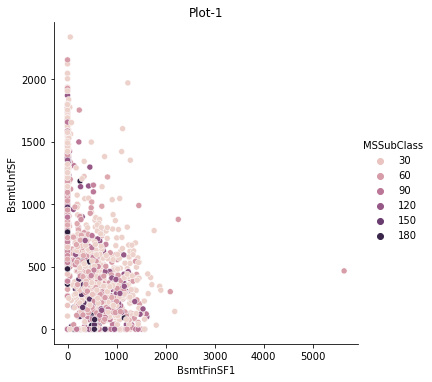

In [17]:
sns.relplot(x = 'BsmtFinSF1', y ='BsmtUnfSF',hue = 'MSSubClass', data = train)
plt.title("Plot-1")

plt.show()

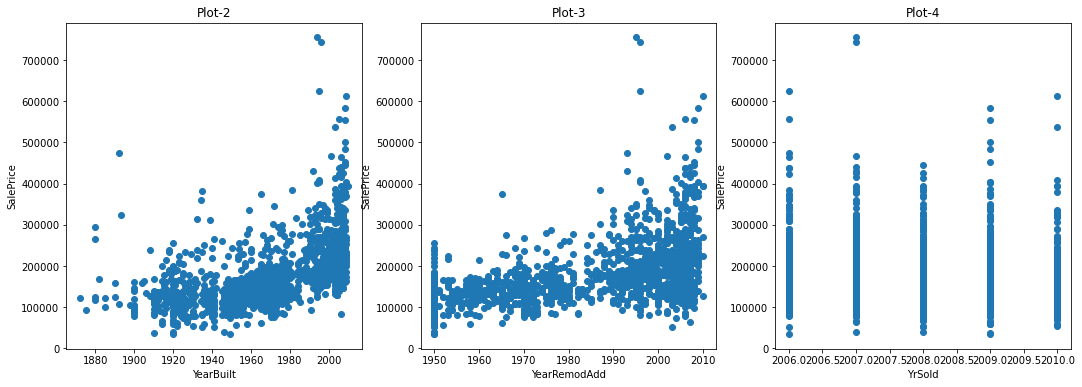

In [18]:
plt.figure(figsize=(18,6))
plt.subplots_adjust()
plt.subplot(1,3,1)
plt.scatter(train["YearBuilt"],train['SalePrice'])
plt.title("Plot-2")
plt.xlabel("YearBuilt")
plt.ylabel('SalePrice')
plt.subplot(1,3,2)
plt.scatter(train["YearRemodAdd"],train['SalePrice'])
plt.title("Plot-3")
plt.xlabel("YearRemodAdd")
plt.ylabel('SalePrice')
plt.subplot(1,3,3)
plt.scatter(train["YrSold"],train['SalePrice'])
plt.title("Plot-4")
plt.xlabel("YrSold")
plt.ylabel('SalePrice')
plt.show()

#### PLOT 2 - Above graph shows that the houses that were built in the 1990s have the highest sales price .
#### PLOT 3 -The above graph shows the relationship between the year of remodelling of the houses and sales price of the houses.                             The sales price of the houses was maximum of thoses how were remodelled in between the years 1990 - 2000.

Text(0.5, 1.0, 'House Price vs YearSold')

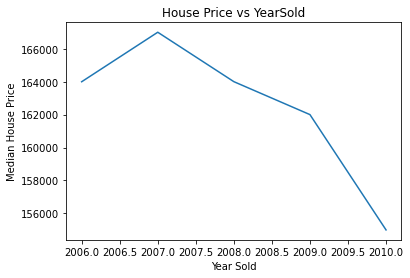

In [19]:
train.groupby("YrSold")["SalePrice"].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

#### By the above graph we can conclude that the price of the house was the highest in the year 2007 but after that the price is constantly falling .

## Model

### Using Linear Regression 

In [20]:
from sklearn.linear_model import LinearRegression
import sklearn

In [21]:
y_train = train_main['SalePrice']
train_main = train_main.drop({'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'GarageQual_Ex',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'MiscFeature_TenC',
 'PoolQC_Fa',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll', 'SalePrice',
 'Utilities_NoSeWa'}, axis = 1)

In [22]:
train_main = train_main.fillna(-1)
test_main = test_main.fillna(-1)

In [23]:
set(train_main.columns).symmetric_difference(set(test_main.columns))

set()

In [24]:
reg = LinearRegression().fit(train_main, y_train)

In [25]:
reg.score(train_main, y_train)

0.9171134998915128

In [26]:
pred = reg.predict(test_main)

In [27]:
submission = pd.DataFrame(pred, columns = ['SalePrice'])
submission = pd.concat([test_main['Id'], submission], axis= 1)
submission

,Id,SalePrice
0,1461,106255.677972
1,1462,120557.967880
2,1463,177591.829715
3,1464,191069.018840
4,1465,207680.882341
...,...,...
1454,2915,80981.831224
1455,2916,83307.356799
1456,2917,168986.793777
1457,2918,109793.644853


In [28]:
submission.to_csv('submission.csv',index=False)